# Logistic Regression 

## Introduction
Logistic regression is a classification algorithm used to assing observation to a discrete set classes. unlike linear regression 
which output continuous number value  

Logistic regression predicts the probability of an outcome that can only have two values (i.e. a dichotomy). The prediction is based on the use of one or several predictors (numerical and categorical). A linear regression is not appropriate for predicting the value of a binary variable for two reasons:

Logistic regression can be used for:

-   Binary classification 
-   Multi-class classification 
-   One-vs-Rest classification 
## Logistic Regression Assumptions

-   The predictor variables are independent
-   The predictor variables are normally distributed
-   The response variable is binary


## import libraries 

In [13]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score , recall_score, precision_score , f1_score ,confusion_matrix ,classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler , LabelEncoder

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# load dataset  
df = pd.read_csv('titanic_prediction.csv')



In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          418 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         418 non-null    float64
 10  Embarked     418 non-null    object 
 11  age_group    418 non-null    object 
 12  Family       418 non-null    int64  
 13  IsAlone      418 non-null    int64  
 14  Age_Bin      418 non-null    int64  
 15  Fare_Bin     418 non-null    int64  
 16  AgeState     418 non-null    float64
 17  Gender_Type  418 non-null    float64
dtypes: float64(4), int64(9), object(5)
memory usage: 5

In [7]:
# check missing values 
print(df.isnull().sum().sort_index(ascending=False))




age_group      0
Ticket         0
Survived       0
SibSp          0
Sex            0
Pclass         0
PassengerId    0
Parch          0
Name           0
IsAlone        0
Gender_Type    0
Fare_Bin       0
Fare           0
Family         0
Embarked       0
Age_Bin        0
AgeState       0
Age            0
dtype: int64


# LabelEncoder

In [8]:
for i in df.columns:
    if df[i].dtype == 'object' or df[i].dtype == 'category':
        df[i] = LabelEncoder().fit_transform(df[i])

df.head()



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,age_group,Family,IsAlone,Age_Bin,Fare_Bin,AgeState,Gender_Type
0,892,0,3,206,1,34.5,0,0,152,7.8292,1,3,1,1,6,0,0.300885,0.0
1,893,1,3,403,0,47.0,1,0,221,7.0000,2,4,2,0,9,0,0.333333,1.0
2,894,0,2,269,1,62.0,0,0,73,9.6875,1,4,1,1,12,1,0.333333,0.0
3,895,0,3,408,1,27.0,0,0,147,8.6625,2,3,1,1,5,1,0.362069,0.0
4,896,1,3,178,0,22.0,1,1,138,12.2875,2,3,3,0,4,1,0.328767,1.0


# X and y columns 

In [10]:
# X and y columns 
X = df.drop('Survived' , axis = 1)
y = df['Survived']

# train test split the data 

In [11]:
# train test split the data 
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2)

# call model 

In [14]:
# call model 
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

# predict the values

In [15]:
# predict the values
y_pred = model.predict(X_test)

# evaluate the model 

In [16]:
# evaluate the model 

print('Accuracy score : ' , accuracy_score(y_test , y_pred))
print('Recall score : ' , recall_score(y_test , y_pred))
print('Precision score : ' , precision_score(y_test , y_pred))
print('F1 score : ' , f1_score(y_test , y_pred))
print('Confusion matrix : ' , confusion_matrix(y_test , y_pred))
print('Classification report : ' , classification_report(y_test , y_pred))


Accuracy score :  1.0
Recall score :  1.0
Precision score :  1.0
F1 score :  1.0
Confusion matrix :  [[56  0]
 [ 0 28]]
Classification report :                precision    recall  f1-score   support

           0       1.00      1.00      1.00        56
           1       1.00      1.00      1.00        28

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



# plot the confusion the metric

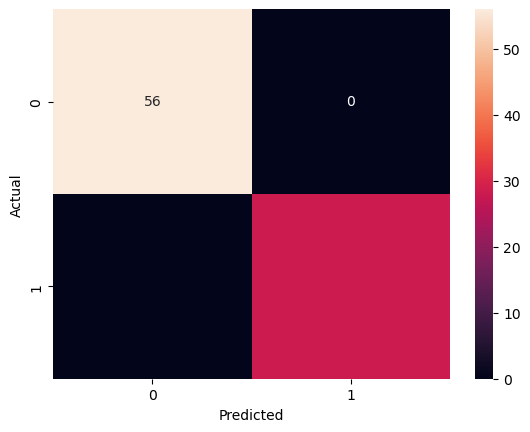

In [17]:
# plot the confusion the metric

sns.heatmap(confusion_matrix(y_test , y_pred) , annot = True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [18]:
#save model
import pickle

with open('model_lg.pkl' , 'wb') as f:
    pickle.dump(model , f)